In [1]:
import time
from pathlib import Path

import numpy as np
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score

from lib import run_experiment

In [2]:
experiments_path = Path('experiments')

# Experiment 1
---
Dimension: 20

Number of clusters: 2

T parameter (distance between centroids): [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

P Minkowski parameter: [0.2, 0.5, 1, 2]

M number of repeats: 1000

N number of points: [100, 500, 1000]

In [3]:
experiment_name = 'Experiment 1'
dimension = 20
n_clusters = 2
T_parameter = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
minkowski_parameter = [0.2, 0.5, 1, 2]
repeats = 1000
n_points = 100

output_path = experiments_path / 'experiment_1'

In [4]:
run_experiment(
    dimension=dimension,
    n_clusters=n_clusters,
    distance_parameters=T_parameter,
    minkowski_parameters=minkowski_parameter,
    repeats=repeats,
    n_points=n_points,
    experiment_name=experiment_name,
    output_path=output_path
)

# Experiment 2
---
Dimension: 20

Number of clusters: 3

T parameter (distance between centroids): [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

P Minkowski parameter: [0.2, 0.5, 1, 2]

M number of repeats: 1000

N number of points: [100, 500, 1000]

# hgjb,.l

/Users/alexgiving/Documents/diploma/lib/metric_meter.py:25: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return table.to_latex(index=True, escape=True, caption=caption)


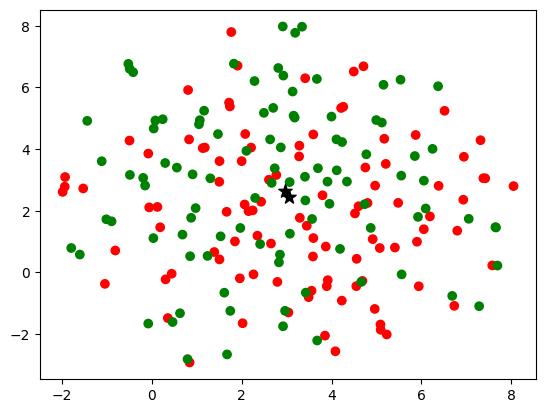

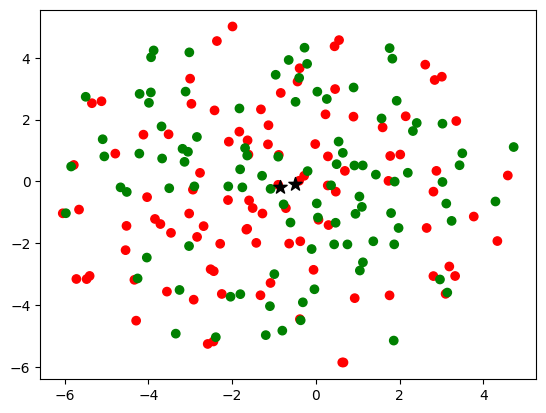

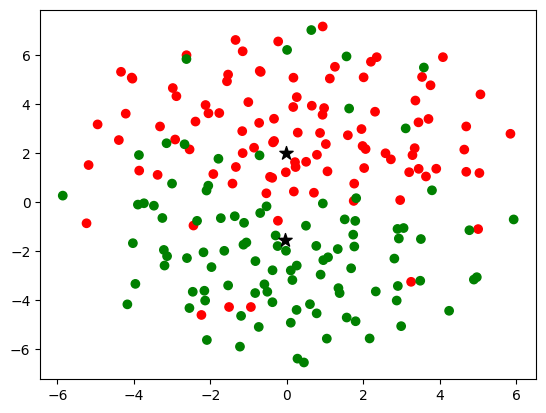

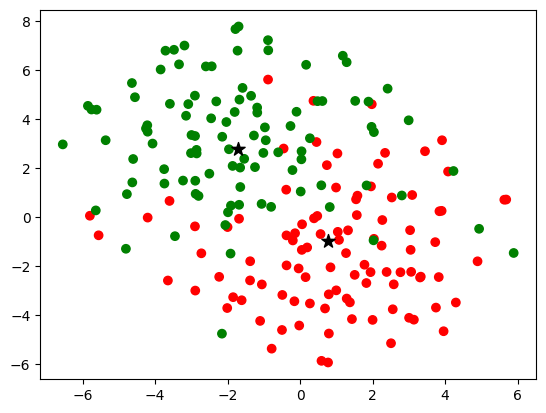

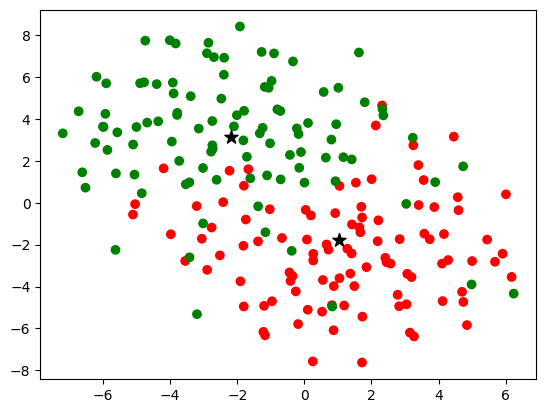

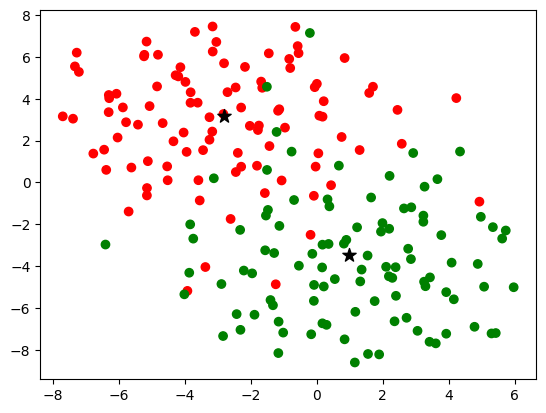

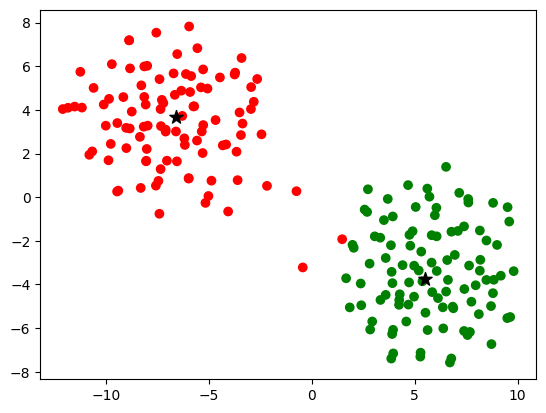

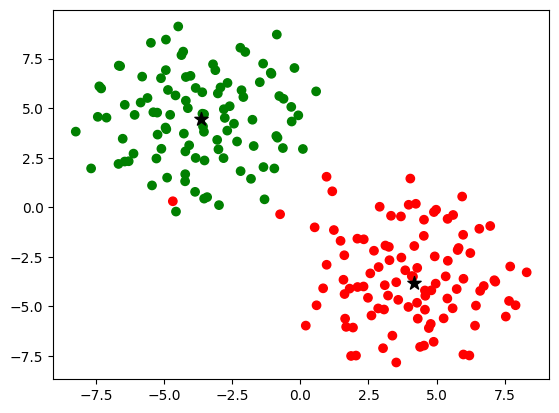

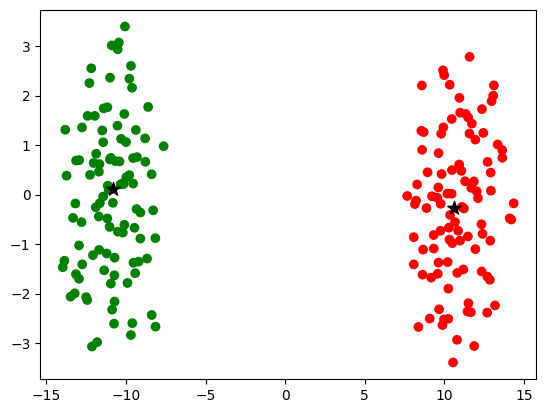

In [7]:
dimension = 20 # dimensionality
n_clusters = 2 # Number of clusters
sigma = 1 # STD distribution
n_points_per_cluster = 100
repeats = 1

path_data = Path('experiments') / f'experiment_1_sigma_{sigma}'
path_data.mkdir(exist_ok=True, parents=True)

metrics = MetricTable()
for distance_factor in np.arange(0.5, 3., 0.3):
    distance_factor_name = f'{distance_factor:.1f}'

    for p in [2, 1, 0.5, 0.2]:

        repeats_ari = []
        repeats_ami = []
        repeats_time = []

        experiment_name = f'Exp: (p={p}, fact={distance_factor_name})'
        for repeat in range(repeats):

            centroid = generate_cluster_centroids(
                dimension=dimension,
                n_clusters=n_clusters,
                distance_factor=distance_factor
            )

            clusters, labels = generate_gaussian_clusters(
                dimension=dimension,
                sigma=sigma,
                centroid_locations=centroid,
                n_points_per_cluster=n_points_per_cluster
            )

            experiment_time = time.perf_counter()
            kmeans = KMeans(n_clusters=n_clusters, p=p)
            generated_centroids, generated_labels = kmeans.fit(clusters)

            repeats_time.append(time.perf_counter()-experiment_time)
            repeats_ari.append(adjusted_rand_score(labels, generated_labels))
            repeats_ami.append(adjusted_mutual_info_score(labels, generated_labels))

        frame = get_average_experiment_metrics(repeats_ari, repeats_ami, name=experiment_name, time=repeats_time)
        metrics.add_frame(frame)

    # To add midrule
    metrics.add_empty_frame(True)

    log_name = f'factor_{distance_factor_name}'.replace('.', '_')
    fig = get_tsne_clusters(clusters, labels, centroid)
    fig.savefig(path_data / f'{log_name}.png')

table_name = 'experiment 1'
table = metrics.get_latex_table(caption='Experiment 1')
table = insert_hline(table)

latex_logs = path_data / f'{table_name.replace(" ", "_")}.tex'
with latex_logs.open('w') as f:
    f.write(table)

# Experiment 2
